#Portfolio Assets Allocation Optimization

# Function/Background

In [1]:
#!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
def fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include):
  Stock = yf.download(columns_of_firms, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Clean column names
  Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
  Stock = Stock_adj_close.reset_index()
  Stock = Stock.fillna("")
  Stock.iloc[:, 1:] = Stock.iloc[:, 1:].pct_change()
  Stock = Stock.dropna()
  Stock["Date"] = pd.to_datetime(Stock["Date"])
  return Stock

# Basic Data Input

In [4]:
columns_of_firms = ["AAPL" ,"AMZN", "XOM", "GOOG", "META", "MSFT", "NVDA", "TSLA", "UNH", "CVS", "MNST", "BRK-B"]
columns_of_factors = ["VTI","SIZE",	"VLUE",	"MTUM",	"QUAL",	"USMV",	"DGRO"]

In [5]:
Enddate = "2024-04-30"
Enddate = pd.to_datetime(Enddate)
Months_to_include = 60

# Data Collection and Organization

In [6]:
Stock = fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include)
Stock.index = Stock['Date'].values
Stock = Stock.drop(columns=['Date'])
Stock.head()

[*********************100%%**********************]  12 of 12 completed


,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM
2019-05-01,-0.127573,-0.078613,-0.089013,-0.036962,-0.071394,-0.082368,0.037919,-0.052986,-0.251602,-0.224266,0.037457,-0.118460
2019-06-01,0.130519,0.066792,0.079779,0.040481,-0.020587,0.087508,0.031846,0.083118,0.212387,0.206848,0.009140,0.082803
2019-07-01,0.076394,-0.014179,-0.036309,0.025326,0.125607,0.006373,0.010027,0.017244,0.027340,0.081223,0.020491,-0.029623
2019-08-01,-0.020184,-0.048474,-0.009833,0.090388,-0.023490,-0.044071,-0.089964,0.011668,-0.007172,-0.066222,-0.060279,-0.079075
2019-09-01,0.072962,-0.022733,0.022664,0.035292,0.026008,-0.040879,-0.010397,0.008487,0.039162,0.067639,-0.071282,0.031104


In [7]:
Factor = fetch_data_from_yahoo(columns_of_factors, Enddate, Months_to_include)
Factor.index = Factor['Date'].values
Factor = Factor.drop(columns=['Date'])
Factor.head()

[*********************100%%**********************]  7 of 7 completed


,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
2019-05-01,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.064499
2019-06-01,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.066814
2019-07-01,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.014125
2019-08-01,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.020827
2019-09-01,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.013151


In [8]:
Stock = Stock.merge(Factor, left_index=True, right_index=True)
Stock.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
2019-05-01,-0.127573,-0.078613,-0.089013,-0.036962,-0.071394,-0.082368,0.037919,-0.052986,-0.251602,-0.224266,0.037457,-0.118460,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.064499
2019-06-01,0.130519,0.066792,0.079779,0.040481,-0.020587,0.087508,0.031846,0.083118,0.212387,0.206848,0.009140,0.082803,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.066814
2019-07-01,0.076394,-0.014179,-0.036309,0.025326,0.125607,0.006373,0.010027,0.017244,0.027340,0.081223,0.020491,-0.029623,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.014125
2019-08-01,-0.020184,-0.048474,-0.009833,0.090388,-0.023490,-0.044071,-0.089964,0.011668,-0.007172,-0.066222,-0.060279,-0.079075,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.020827
2019-09-01,0.072962,-0.022733,0.022664,0.035292,0.026008,-0.040879,-0.010397,0.008487,0.039162,0.067639,-0.071282,0.031104,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.013151


In [9]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
# Fetch data
Index = yf.download(Index, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]
# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  3 of 3 completed


Column names cleaned and DataFrame reset.


In [10]:
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
Index = fetch_data_from_yahoo(Index, Enddate, Months_to_include)
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index.head()

[*********************100%%**********************]  3 of 3 completed


,Date,Dow Jones,S&P 500,NASDAQ
1,2019-05-01,-0.066855,-0.065778,-0.079334
2,2019-06-01,0.071929,0.068930,0.074209
3,2019-07-01,0.009936,0.013128,0.021131
4,2019-08-01,-0.017160,-0.018092,-0.025997
5,2019-09-01,0.019450,0.017181,0.004579


In [11]:
Stock['Index'] = Index['S&P 500'].values

In [12]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
risk_free = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year
# Fetch data
Risk_Free_Rate = yf.download(risk_free, start=Enddate - pd.DateOffset(months=Months_to_include), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]
# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  4 of 4 completed

Column names cleaned and DataFrame reset.


In [13]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W', 'TB5', 'TB10', 'TB30']]
Risk_Free_Rate.tail()

,Date,TB13W,TB5,TB10,TB30
55,2023-12-01,0.05180,0.03840,0.03866,0.04019
56,2024-01-01,0.05188,0.03882,0.03967,0.04215
57,2024-02-01,0.05223,0.04262,0.04252,0.04375
58,2024-03-01,0.05203,0.04220,0.04206,0.04349
59,2024-04-01,0.05245,0.04723,0.04686,0.04790


In [14]:
Stock['Risk_Free_Rate'] = Risk_Free_Rate['TB13W'].values/12
Stock.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,...,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
2019-05-01,-0.127573,-0.078613,-0.089013,-0.036962,-0.071394,-0.082368,0.037919,-0.052986,-0.251602,-0.224266,...,-0.118460,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.064499,-0.065778,0.001911
2019-06-01,0.130519,0.066792,0.079779,0.040481,-0.020587,0.087508,0.031846,0.083118,0.212387,0.206848,...,0.082803,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.066814,0.068930,0.001696
2019-07-01,0.076394,-0.014179,-0.036309,0.025326,0.125607,0.006373,0.010027,0.017244,0.027340,0.081223,...,-0.029623,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.014125,0.013128,0.001692
2019-08-01,-0.020184,-0.048474,-0.009833,0.090388,-0.023490,-0.044071,-0.089964,0.011668,-0.007172,-0.066222,...,-0.079075,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.020827,-0.018092,0.001611
2019-09-01,0.072962,-0.022733,0.022664,0.035292,0.026008,-0.040879,-0.010397,0.008487,0.039162,0.067639,...,0.031104,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.013151,0.017181,0.001475


In [15]:
Stock.tail()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,...,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
2023-12-01,0.013583,0.040044,-0.009278,0.162031,0.052345,0.081950,0.044606,-0.007574,0.058841,0.034988,...,-0.026864,0.041812,0.045167,0.043028,0.070373,0.022004,0.068780,0.048440,0.044229,0.004317
2024-01-01,-0.042227,0.021456,0.075927,-0.058131,0.006173,0.102215,-0.044957,0.057281,0.242418,-0.246257,...,0.028306,0.012635,0.055835,0.022835,-0.009024,0.021658,-0.008501,0.011171,0.015896,0.004323
2024-02-01,-0.019794,0.138918,0.066868,0.000000,-0.014245,0.256293,0.074155,0.040394,0.285809,0.077901,...,0.016633,0.030826,0.099970,0.064983,0.047980,0.020948,0.025224,0.052987,0.051721,0.004353
2024-03-01,-0.051286,0.020480,0.027162,0.072475,0.089283,-0.009283,0.003046,0.017116,0.142128,-0.129235,...,0.112132,0.033464,0.028209,0.025393,0.038992,0.026908,0.053292,0.028981,0.031019,0.004336
2024-04-01,-0.006706,-0.029826,-0.056573,-0.151078,0.081308,-0.114111,-0.098347,-0.074610,-0.043760,0.042608,...,0.017464,-0.036342,-0.054657,-0.044965,-0.053061,-0.037449,-0.067953,-0.043440,-0.041615,0.004371


In [16]:
Excess_Returns = Stock.apply(lambda x: x - Stock["Risk_Free_Rate"] if x.name not in ["Risk_Free_Rate"] else x)
Excess_Returns.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,...,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
2019-05-01,-0.129483,-0.080524,-0.090924,-0.038873,-0.073305,-0.084279,0.036009,-0.054897,-0.253513,-0.226177,...,-0.120371,-0.059608,-0.023879,-0.067736,-0.071095,-0.018056,-0.097927,-0.066410,-0.067689,0.001911
2019-06-01,0.128823,0.065096,0.078083,0.038785,-0.022282,0.085812,0.030150,0.081422,0.210691,0.205152,...,0.081108,0.061483,0.055439,0.063643,0.068515,0.042628,0.085767,0.065118,0.067234,0.001696
2019-07-01,0.074703,-0.015871,-0.038001,0.023634,0.123915,0.004681,0.008335,0.015552,0.025648,0.079531,...,-0.031314,0.012444,0.016268,0.012083,0.010396,0.014994,0.014320,0.012433,0.011436,0.001692
2019-08-01,-0.021795,-0.050085,-0.011444,0.088778,-0.025101,-0.045682,-0.091575,0.010057,-0.008783,-0.067833,...,-0.080686,-0.015292,0.001040,-0.019404,-0.036139,0.014323,-0.046828,-0.022437,-0.019702,0.001611
2019-09-01,0.071487,-0.024208,0.021189,0.033817,0.024533,-0.042354,-0.011872,0.007012,0.037687,0.066164,...,0.029629,0.022864,-0.016345,0.013018,0.019443,0.003857,0.040170,0.011676,0.015706,0.001475


# Regression

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf #this will have linear regression and logistic regression modules

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, and intercepts
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, intercepts, and slopes
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()
Slopes_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, intercept, and slope
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name
        slope = model.params[1]  # Access the slope for VTI

        # Store results in the appropriate DataFrames
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [19]:
Market_Beta.head()

,AAPL_Predicted,AAPL_Residuals,AAPL_Intercept,AMZN_Predicted,AMZN_Residuals,AMZN_Intercept,BRK-B_Predicted,BRK-B_Residuals,BRK-B_Intercept,CVS_Predicted,...,NVDA_Intercept,TSLA_Predicted,TSLA_Residuals,TSLA_Intercept,UNH_Predicted,UNH_Residuals,UNH_Intercept,XOM_Predicted,XOM_Residuals,XOM_Intercept
2019-05-01,-0.067606,-0.061878,0.012617,-0.070054,-0.010470,0.003461,-0.052743,-0.038181,0.003241,-0.035752,...,0.045637,-0.118277,-0.107900,0.041845,-0.027433,0.062979,0.007972,-0.059156,-0.061215,0.002083
2019-06-01,0.091279,0.037545,0.012617,0.075546,-0.010450,0.003461,0.058136,0.019947,0.003241,0.035119,...,0.045637,0.198852,0.006300,0.041845,0.042688,-0.035244,0.007972,0.062130,0.018978,0.002083
2019-07-01,0.027636,0.047067,0.012617,0.017225,-0.033096,0.003461,0.013723,-0.051724,0.003241,0.006731,...,0.045637,0.071823,0.007707,0.041845,0.014600,0.004199,0.007972,0.013548,-0.044862,0.002083
2019-08-01,-0.014487,-0.007307,0.012617,-0.021377,-0.028708,0.003461,-0.015673,0.004230,0.003241,-0.012058,...,0.045637,-0.012254,-0.055579,0.041845,-0.003990,-0.057899,0.007972,-0.018607,-0.062078,0.002083
2019-09-01,0.026721,0.044765,0.012617,0.016386,-0.040594,0.003461,0.013084,0.008104,0.003241,0.006323,...,0.045637,0.069997,-0.003833,0.041845,0.014197,-0.086954,0.007972,0.012850,0.016779,0.002083


In [20]:
Factor_Market_Beta.head()

,DGRO_Predicted,DGRO_Residuals,DGRO_Intercept,MTUM_Predicted,MTUM_Residuals,MTUM_Intercept,QUAL_Predicted,QUAL_Residuals,QUAL_Intercept,SIZE_Predicted,...,SIZE_Intercept,USMV_Predicted,USMV_Residuals,USMV_Intercept,VLUE_Predicted,VLUE_Residuals,VLUE_Intercept,VTI_Predicted,VTI_Residuals,VTI_Intercept
2019-05-01,-0.058920,-0.000688,-0.001197,-0.060751,0.036872,-0.000367,-0.065424,-0.002312,0.000625,-0.072930,...,-0.002155,-0.049315,0.031259,-0.001793,-0.073362,-0.024565,-0.004858,-0.066410,4.163336e-17,-8.782038e-18
2019-06-01,0.055403,0.006080,-0.001197,0.058842,-0.003403,-0.000367,0.065390,-0.001747,0.000625,0.067243,...,-0.002155,0.044805,-0.002177,-0.001793,0.062313,0.023454,-0.004858,0.065118,-1.387779e-17,-8.782038e-18
2019-07-01,0.009610,0.002835,-0.001197,0.010938,0.005330,-0.000367,0.012991,-0.000908,0.000625,0.011096,...,-0.002155,0.007105,0.007889,-0.001793,0.007967,0.006353,-0.004858,0.012433,3.469447e-18,-8.782038e-18
2019-08-01,-0.020700,0.005408,-0.001197,-0.020768,0.021808,-0.000367,-0.021690,0.002286,0.000625,-0.026067,...,-0.002155,-0.017849,0.032172,-0.001793,-0.028003,-0.018825,-0.004858,-0.022437,2.081668e-17,-8.782038e-18
2019-09-01,0.008951,0.013913,-0.001197,0.010250,-0.026594,-0.000367,0.012238,0.000780,0.000625,0.010288,...,-0.002155,0.006563,-0.002705,-0.001793,0.007186,0.032985,-0.004858,0.011676,3.469447e-18,-8.782038e-18


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime, timedelta

# Assuming 'your_table' is your DataFrame

# Create DataFrames to store predicted values, residuals, and intercepts
Organized_Market_Beta = pd.DataFrame()
Organized_Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            # Add time information
            Organized_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

        elif column in columns_of_factors:
            # Add time information
            Organized_Factor_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

In [22]:
Organized_Market_Beta.head()

,AAPL_Organized_Data,AMZN_Organized_Data,BRK-B_Organized_Data,CVS_Organized_Data,GOOG_Organized_Data,META_Organized_Data,MNST_Organized_Data,MSFT_Organized_Data,NVDA_Organized_Data,TSLA_Organized_Data,UNH_Organized_Data,XOM_Organized_Data
2019-05-01,-0.049261,-0.007009,-0.034940,-0.003089,-0.007046,-0.009409,0.083387,0.000746,-0.142869,-0.066055,0.070951,-0.059133
2019-06-01,0.050162,-0.006989,0.023188,0.003698,-0.087252,0.012399,-0.016306,0.026862,0.102200,0.048146,-0.027272,0.021060
2019-07-01,0.059684,-0.029634,-0.048482,0.016935,0.111510,-0.009336,-0.000535,0.005135,0.004933,0.049553,0.012171,-0.042780
2019-08-01,0.005309,-0.025247,0.007471,0.100868,-0.002715,-0.020387,-0.075568,0.028857,0.028600,-0.013734,-0.049927,-0.059995
2019-09-01,0.057382,-0.037133,0.011346,0.027526,0.012884,-0.055517,-0.020202,-0.002771,0.018234,0.038012,-0.078982,0.018862


In [23]:
Organized_Factor_Market_Beta.head()

,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data,VTI_Organized_Data
2019-05-01,-0.001885,0.036505,-0.001686,-0.000321,0.029467,-0.029423,3.285133e-17
2019-06-01,0.004883,-0.003770,-0.001122,-0.000883,-0.003970,0.018596,-2.265983e-17
2019-07-01,0.001638,0.004963,-0.000283,-0.002854,0.006097,0.001495,-5.312591e-18
2019-08-01,0.004211,0.021441,0.002911,-0.012226,0.030379,-0.023683,1.203464e-17
2019-09-01,0.012716,-0.026961,0.001405,0.006999,-0.004498,0.028126,-5.312591e-18


In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Factor_Beta = pd.DataFrame()
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) factors
X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
  if column not in columns_to_exclude:

    # Get the target variable (y)
     y = Organized_Market_Beta[column]

    # Perform linear regression using statsmodels
     model = sm.OLS(y, X).fit()

    # Get predicted values, residuals, and intercept
     predicted_values = model.predict(X)
     residuals = model.resid
     intercept = model.params[0]  # Access the intercept without specifying the variable name

    # Store results in the appropriate DataFrame
     Factor_Beta[f"{column}_Predicted"] = predicted_values
     Factor_Beta[f"{column}_Residuals"] = residuals
     Factor_Beta[f"{column}_Intercept"] = intercept

In [25]:
Factor_Beta.head()

,AAPL_Organized_Data_Predicted,AAPL_Organized_Data_Residuals,AAPL_Organized_Data_Intercept,AMZN_Organized_Data_Predicted,AMZN_Organized_Data_Residuals,AMZN_Organized_Data_Intercept,BRK-B_Organized_Data_Predicted,BRK-B_Organized_Data_Residuals,BRK-B_Organized_Data_Intercept,CVS_Organized_Data_Predicted,...,NVDA_Organized_Data_Intercept,TSLA_Organized_Data_Predicted,TSLA_Organized_Data_Residuals,TSLA_Organized_Data_Intercept,UNH_Organized_Data_Predicted,UNH_Organized_Data_Residuals,UNH_Organized_Data_Intercept,XOM_Organized_Data_Predicted,XOM_Organized_Data_Residuals,XOM_Organized_Data_Intercept
2019-05-01,-0.013386,-0.035875,0.005333,-0.013251,0.006242,-0.005766,-0.008209,-0.026730,0.003178,-0.014136,...,0.033842,0.013924,-0.079979,0.024591,0.020096,0.050855,0.00562,-0.041088,-0.018044,0.009455
2019-06-01,0.010573,0.039589,0.005333,-0.019977,0.012988,-0.005766,0.014432,0.008757,0.003178,0.021541,...,0.033842,0.005508,0.042637,0.024591,0.002973,-0.030245,0.00562,0.044820,-0.023759,0.009455
2019-07-01,0.011336,0.048348,0.005333,-0.008882,-0.020752,-0.005766,0.007129,-0.055611,0.003178,0.007084,...,0.033842,0.019556,0.029997,0.024591,0.009187,0.002984,0.00562,0.012854,-0.055634,0.009455
2019-08-01,0.031180,-0.025871,0.005333,-0.001161,-0.024086,-0.005766,0.009786,-0.002315,0.003178,-0.002329,...,0.033842,0.028416,-0.042150,0.024591,0.040301,-0.090228,0.00562,-0.028698,-0.031297,0.009455
2019-09-01,0.000769,0.056613,0.005333,-0.043335,0.006202,-0.005766,0.015348,-0.004003,0.003178,0.038727,...,0.033842,-0.038829,0.076841,0.024591,0.016977,-0.095958,0.00562,0.059053,-0.040190,0.009455


In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Firm_Residues = pd.DataFrame()

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:

    # Store results in the appropriate DataFrame
    Firm_Residues[f"{column}_Residuals"] = Factor_Beta[f"{column}_Residuals"] + Factor_Beta[f"{column}_Intercept"]

In [27]:
Firm_Residues.head()

,AAPL_Organized_Data_Residuals,AMZN_Organized_Data_Residuals,BRK-B_Organized_Data_Residuals,CVS_Organized_Data_Residuals,GOOG_Organized_Data_Residuals,META_Organized_Data_Residuals,MNST_Organized_Data_Residuals,MSFT_Organized_Data_Residuals,NVDA_Organized_Data_Residuals,TSLA_Organized_Data_Residuals,UNH_Organized_Data_Residuals,XOM_Organized_Data_Residuals
2019-05-01,-0.030542,0.000476,-0.023552,0.015114,-0.004614,0.023280,0.059053,-0.006620,-0.058404,-0.055388,0.056475,-0.008589
2019-06-01,0.044922,0.007222,0.011935,-0.013777,-0.080083,0.028706,-0.004213,0.029437,0.100635,0.067228,-0.024625,-0.014304
2019-07-01,0.053681,-0.026518,-0.052433,0.013917,0.111555,0.002103,-0.000027,-0.001154,0.017857,0.054588,0.008604,-0.046179
2019-08-01,-0.020538,-0.029852,0.000864,0.107263,-0.011881,-0.009978,-0.096231,-0.002905,0.085839,-0.017559,-0.084608,-0.021842
2019-09-01,0.061946,0.000436,-0.000824,-0.007135,0.020596,-0.057036,-0.021235,0.017184,0.043056,0.101432,-0.090338,-0.030735


# Beta

In [28]:
# Create a DataFrame to store coefficients
Factor_Beta = pd.DataFrame()

X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
    if column not in columns_to_exclude:

        # Get the target variable (y)
        y = Organized_Market_Beta[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get coefficients and intercept
        coefficients = model.params[1:]  # Exclude the intercept

        # Store coefficients in the appropriate DataFrame
        Factor_Beta[column] = coefficients

# Transpose the DataFrame
Factor_Beta = Factor_Beta.T

# Set the first row as the header
Factor_Beta.columns = X.columns[1:]

# Rename the index column
Factor_Beta = Factor_Beta.rename_axis('Factor').reset_index()
Factor_Beta.columns = [col.replace('_Organized_Data', '') for col in Factor_Beta.columns]

In [29]:
Factor_Beta = Factor_Beta.drop(columns=Factor_Beta.columns[0])
Factor_Beta.head()

,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
0,0.740575,-0.873163,-2.278186,-3.338177,-0.073558,-0.401299,-1.925061e-16
1,-2.007545,-0.565880,-0.577488,-1.825794,-0.262945,-0.529392,8.429237e-17
2,1.212683,0.222071,0.452822,-0.901694,-0.320380,0.247861,-1.615410e-16
3,1.947919,-0.032556,-0.682149,-0.060903,-0.146721,0.346259,-1.691946e-16
4,-1.161589,-0.726834,-0.207831,-0.760817,0.568492,-0.155163,9.814248e-17


In [30]:
# Create a DataFrame to store slopes for each output in Market_Beta
Slopes_Market_Beta = pd.DataFrame(index=[0])
columns_to_exclude = ["Year", "Month", "T-Bill"]

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get the slope for VTI
        slope = model.params[1]  # Access the slope for VTI

        # Store the slope value in the appropriate DataFrame
        Slopes_Market_Beta.at[0, f"{column}"] = slope

In [31]:
Slopes_Market_Beta.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,...,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
0,1.207993,1.106992,0.84301,0.538833,0.99773,1.127389,0.71342,0.83787,1.666081,2.411123,...,0.922134,0.869192,0.909265,0.99458,1.065726,0.715599,1.031531,1.0,0.963308,-0.000713


In [32]:
# Rename the first column to remove "Organized_Data"
Slopes_Market_Beta.columns = [col.replace("_Organized_Data", "") for col in Slopes_Market_Beta.columns]

# Select the desired columns
Slopes_Market_Beta = Slopes_Market_Beta[columns_of_firms]

In [33]:
Slopes_Market_Beta.head()

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
0,1.207993,1.106992,0.922134,0.99773,1.127389,0.83787,1.666081,2.411123,0.533132,0.538833,0.71342,0.84301


In [34]:
Slopes_Market_Beta = Slopes_Market_Beta.T
Slopes_Market_Beta.columns = ["VIT"]
Slopes_Market_Beta.update(Factor_Beta)

In [35]:
# Iterate over columns in Slopes_Market_Beta
for column in Factor_Beta.columns:
    # Check if the column exists in Beta
      Slopes_Market_Beta[column] = Factor_Beta[column].values
Beta = Slopes_Market_Beta

In [36]:
Beta.head()

,VIT,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
AAPL,1.207993,0.740575,-0.873163,-2.278186,-3.338177,-0.073558,-0.401299,-1.925061e-16
AMZN,1.106992,-2.007545,-0.565880,-0.577488,-1.825794,-0.262945,-0.529392,8.429237e-17
XOM,0.922134,1.212683,0.222071,0.452822,-0.901694,-0.320380,0.247861,-1.615410e-16
GOOG,0.997730,1.947919,-0.032556,-0.682149,-0.060903,-0.146721,0.346259,-1.691946e-16
META,1.127389,-1.161589,-0.726834,-0.207831,-0.760817,0.568492,-0.155163,9.814248e-17


# Covariance Matrix

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed

market_covariance_matrix = Excess_Returns[columns_of_firms].cov()
market_covariance_matrix = market_covariance_matrix*12

index_variance = pd.DataFrame({'VTI': [Excess_Returns['VTI'].var() * 12]})

factor_covariance_matrix = Organized_Factor_Market_Beta.cov()
factor_covariance_matrix = factor_covariance_matrix*12
factor_covariance_matrix = pd.concat([factor_covariance_matrix, index_variance])
factor_covariance_matrix = factor_covariance_matrix.fillna(0)
# Swap last column with first column
factor_covariance_matrix = factor_covariance_matrix[[factor_covariance_matrix.columns[-1]] + list(factor_covariance_matrix.columns[:-1])]

# Swap last row with first row
factor_covariance_matrix = factor_covariance_matrix.reindex([factor_covariance_matrix.index[-1]] + list(factor_covariance_matrix.index[:-1]))
factor_covariance_matrix.index = ["VTI"] + list(factor_covariance_matrix.index[1:])

In [38]:
factor_covariance_matrix

,VTI,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data,VTI_Organized_Data
VTI,0.036447,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DGRO_Organized_Data,0.000000,2.674943e-03,-3.176950e-04,2.737957e-04,1.025297e-03,1.755464e-03,3.121045e-03,5.852029e-21
MTUM_Organized_Data,0.000000,-3.176950e-04,7.495787e-03,-2.721545e-04,-1.098598e-03,1.299750e-03,-2.746248e-03,8.306778e-20
QUAL_Organized_Data,0.000000,2.737957e-04,-2.721545e-04,1.190073e-03,-5.053714e-04,7.515491e-04,-6.271446e-04,-5.501414e-20
SIZE_Organized_Data,0.000000,1.025297e-03,-1.098598e-03,-5.053714e-04,2.012955e-03,1.232061e-05,2.866591e-03,9.038733e-20
USMV_Organized_Data,0.000000,1.755464e-03,1.299750e-03,7.515491e-04,1.232061e-05,3.641887e-03,-2.526203e-05,4.951343e-20
VLUE_Organized_Data,0.000000,3.121045e-03,-2.746248e-03,-6.271446e-04,2.866591e-03,-2.526203e-05,8.512564e-03,1.324289e-19
VTI_Organized_Data,0.000000,5.852029e-21,8.306778e-20,-5.501414e-20,9.038733e-20,4.951343e-20,1.324289e-19,7.186974e-33


In [39]:
market_covariance_matrix

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
AAPL,0.091448,0.068448,0.025219,0.045064,0.050942,0.047372,0.086463,0.173149,0.024152,0.015435,0.032484,0.033815
AMZN,0.068448,0.106488,0.011990,0.054523,0.066082,0.049151,0.107811,0.163091,0.012537,0.001691,0.022155,0.027391
XOM,0.025219,0.011990,0.120643,0.024203,0.001201,0.012864,0.011276,0.028005,0.020005,0.022834,0.012506,0.038615
GOOG,0.045064,0.054523,0.024203,0.074046,0.051035,0.038678,0.075663,0.101542,0.018148,0.009561,0.023220,0.025446
META,0.050942,0.066082,0.001201,0.051035,0.168236,0.050146,0.115076,0.111778,0.009442,0.018234,0.034162,0.030883
MSFT,0.047372,0.049151,0.012864,0.038678,0.050146,0.048389,0.073328,0.095480,0.018080,0.009904,0.019605,0.023044
NVDA,0.086463,0.107811,0.011276,0.075663,0.115076,0.073328,0.260633,0.191486,0.005995,0.001763,0.028541,0.050190
TSLA,0.173149,0.163091,0.028005,0.101542,0.111778,0.095480,0.191486,0.597228,0.040512,0.017330,0.048777,0.058250
UNH,0.024152,0.012537,0.020005,0.018148,0.009442,0.018080,0.005995,0.040512,0.047239,0.024575,0.020009,0.018477
CVS,0.015435,0.001691,0.022834,0.009561,0.018234,0.009904,0.001763,0.017330,0.024575,0.063266,0.013931,0.020119


In [40]:
import pandas as pd
import numpy as np

One_Factor_Model_Resuduals = Organized_Market_Beta.var()
df = pd.DataFrame(One_Factor_Model_Resuduals)

# Extract column and index names
columns_and_index = df.index.tolist()

# Create a square matrix with 0s
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal with the values from the DataFrame
np.fill_diagonal(result_matrix, df.iloc[:, 0])

# Create a new DataFrame with the matrix and set column and index names
One_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
One_Factor_Model_Resuduals = One_Factor_Model_Resuduals*12

In [41]:
One_Factor_Model_Resuduals.head(12)

,AAPL_Organized_Data,AMZN_Organized_Data,BRK-B_Organized_Data,CVS_Organized_Data,GOOG_Organized_Data,META_Organized_Data,MNST_Organized_Data,MSFT_Organized_Data,NVDA_Organized_Data,TSLA_Organized_Data,UNH_Organized_Data,XOM_Organized_Data
AAPL_Organized_Data,0.038264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
AMZN_Organized_Data,0.000000,0.061825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
BRK-B_Organized_Data,0.000000,0.000000,0.016738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
CVS_Organized_Data,0.000000,0.000000,0.000000,0.052684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
GOOG_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.037764,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
META_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.121912,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
MNST_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033049,0.000000,0.000000,0.000000,0.00000,0.000000
MSFT_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022802,0.000000,0.000000,0.00000,0.000000
NVDA_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159463,0.000000,0.00000,0.000000
TSLA_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385344,0.00000,0.000000


In [42]:
One_Factor = pd.DataFrame(Beta.iloc[:, 0])
One_Factor = One_Factor.T.values * One_Factor.values
One_Factor = pd.DataFrame(One_Factor)
One_Factor = One_Factor * factor_covariance_matrix.iloc[0,0]
One_Factor = One_Factor.values + One_Factor_Model_Resuduals.values
One_Factor = pd.DataFrame(One_Factor, index=columns_of_firms, columns=columns_of_firms)
One_Factor

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
AAPL,0.091448,0.048738,0.040599,0.043927,0.049636,0.036889,0.073353,0.106155,0.023472,0.023723,0.031410,0.037115
AMZN,0.048738,0.106488,0.037205,0.040255,0.045486,0.033805,0.067220,0.097280,0.021510,0.021740,0.028784,0.034012
XOM,0.040599,0.037205,0.047730,0.033532,0.037890,0.028160,0.055995,0.081035,0.017918,0.018109,0.023977,0.028332
GOOG,0.043927,0.040255,0.033532,0.088965,0.040996,0.030468,0.060585,0.087678,0.019387,0.019594,0.025943,0.030655
META,0.049636,0.045486,0.037890,0.040996,0.084088,0.034428,0.068459,0.099072,0.021906,0.022140,0.029314,0.034639
MSFT,0.036889,0.033805,0.028160,0.030468,0.034428,0.147498,0.050878,0.073630,0.016281,0.016455,0.021786,0.025744
NVDA,0.073353,0.067220,0.055995,0.060585,0.068459,0.050878,0.134218,0.146411,0.032373,0.032720,0.043321,0.051190
TSLA,0.106155,0.097280,0.081035,0.087678,0.099072,0.073630,0.146411,0.234686,0.046850,0.047351,0.062694,0.074082
UNH,0.023472,0.021510,0.017918,0.019387,0.021906,0.016281,0.032373,0.046850,0.169822,0.010470,0.013862,0.016380
CVS,0.023723,0.021740,0.018109,0.019594,0.022140,0.016455,0.032720,0.047351,0.010470,0.395926,0.014011,0.016556


In [43]:
import pandas as pd
import numpy as np

Multi_Factor_Model_Resuduals = Firm_Residues.var()
df = pd.DataFrame(Multi_Factor_Model_Resuduals)
columns_and_index = df.index.tolist()
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))
np.fill_diagonal(result_matrix, df.iloc[:, 0])
Multi_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
Multi_Factor_Model_Resuduals = Multi_Factor_Model_Resuduals*12

In [44]:
Multi_Factor_Model_Resuduals.head(20)

,AAPL_Organized_Data_Residuals,AMZN_Organized_Data_Residuals,BRK-B_Organized_Data_Residuals,CVS_Organized_Data_Residuals,GOOG_Organized_Data_Residuals,META_Organized_Data_Residuals,MNST_Organized_Data_Residuals,MSFT_Organized_Data_Residuals,NVDA_Organized_Data_Residuals,TSLA_Organized_Data_Residuals,UNH_Organized_Data_Residuals,XOM_Organized_Data_Residuals
AAPL_Organized_Data_Residuals,0.018854,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AMZN_Organized_Data_Residuals,0.000000,0.022364,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRK-B_Organized_Data_Residuals,0.000000,0.000000,0.012576,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVS_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.038245,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOOG_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.03008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
META_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.00000,0.090454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MNST_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.028485,0.000000,0.000000,0.000000,0.000000,0.000000
MSFT_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.010606,0.000000,0.000000,0.000000,0.000000
NVDA_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.060245,0.000000,0.000000,0.000000
TSLA_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.218634,0.000000,0.000000


In [45]:
Multi_Factor = factor_covariance_matrix.values @ Beta.T.values
Multi_Factor = Beta @ Multi_Factor
Multi_Factor = Multi_Factor.values + Multi_Factor_Model_Resuduals.values
Multi_Factor = pd.DataFrame(Multi_Factor, index=columns_of_firms, columns=columns_of_firms)

In [46]:
Multi_Factor

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
AAPL,0.091448,0.069406,0.039654,0.036271,0.058296,0.046409,0.071119,0.117492,0.039742,0.067610,0.033258,0.026927
AMZN,0.069406,0.106488,0.029841,0.018441,0.060364,0.055517,0.062372,0.113788,0.067958,0.090598,0.020639,0.007808
XOM,0.039654,0.029841,0.047730,0.038567,0.034721,0.025591,0.056468,0.081000,0.013393,0.002247,0.027900,0.033348
GOOG,0.036271,0.018441,0.038567,0.088965,0.033052,0.017232,0.062350,0.078338,-0.009169,-0.012827,0.031899,0.049250
META,0.058296,0.060364,0.034721,0.033052,0.084088,0.046132,0.068480,0.105753,0.038403,0.044999,0.027478,0.023924
MSFT,0.046409,0.055517,0.025591,0.017232,0.046132,0.147498,0.052995,0.085876,0.059649,0.030780,0.020317,0.004272
NVDA,0.071119,0.062372,0.056468,0.062350,0.068480,0.052995,0.134218,0.145789,0.023405,0.020017,0.048025,0.049008
TSLA,0.117492,0.113788,0.081000,0.078338,0.105753,0.085876,0.145789,0.234686,0.070307,0.067727,0.063103,0.059391
UNH,0.039742,0.067958,0.013393,-0.009169,0.038403,0.059649,0.023405,0.070307,0.169822,0.055528,-0.002858,-0.016775
CVS,0.067610,0.090598,0.002247,-0.012827,0.044999,0.030780,0.020017,0.067727,0.055528,0.395926,0.001137,-0.015584


# Portfolio Optimization

In [47]:
import yfinance as yf
import pandas as pd

def get_market_cap(symbols):
    data = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            market_cap = info.get("marketCap", "N/A")
            data[symbol] = market_cap
        except:
            data[symbol] = "N/A"
    return data

market_cap_data = get_market_cap(columns_of_firms)
MV = pd.DataFrame(market_cap_data.values(), index=market_cap_data.keys(), columns=["MarketCap"])
MV = MV[MV['MarketCap'] != 'N/A']
MV['MarketCap'] = pd.to_numeric(MV['MarketCap'])
MV['Weight'] = MV['MarketCap'] / MV['MarketCap'].sum()
"""
Market_Risk_Premium = 0.06
Market_Volatility = 0.1953
"""

'\nMarket_Risk_Premium = 0.06\nMarket_Volatility = 0.1953\n'

In [48]:
Market_Risk_Premium = Excess_Returns['Index'].mean()*12
Market_Volatility = Excess_Returns['Index'].std()*np.sqrt(12)
print(f"Market_Risk_Premium is {Market_Risk_Premium.round(3)}\nMarket_Volatility is {Market_Volatility.round(3)}")

Market_Risk_Premium is 0.104
Market_Volatility is 0.185


In [49]:
MV['Sample Data'] = (market_covariance_matrix @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['One Factor'] = (One_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['Multi Factor'] = (Multi_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['MarketCap'] = (MV['MarketCap']/1000000).round(3)

In [50]:
MV

,MarketCap,Weight,Sample Data,One Factor,Multi Factor
AAPL,2796939.641,0.175507,0.198587,0.173592,0.186214
AMZN,1964349.719,0.123262,0.213279,0.163535,0.181171
XOM,524364.644,0.032904,0.064092,0.118610,0.115652
GOOG,2125803.160,0.133393,0.160748,0.147877,0.126630
META,1187704.734,0.074528,0.208278,0.151517,0.165637
MSFT,3042341.552,0.190905,0.147824,0.176972,0.189847
NVDA,2263849.894,0.142055,0.329341,0.225542,0.223192
TSLA,567071.605,0.035583,0.439374,0.308221,0.324893
UNH,460923.273,0.028923,0.054311,0.081621,0.118108
CVS,69974.327,0.004391,0.034049,0.073471,0.116598


In [51]:
len(MV)

12

In [52]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Initial weights (equal distribution)
initial_weights = np.array([1/len(MV)]*len(MV))
cov_matrix = market_covariance_matrix

# Define upper and lower limits for each weight
lower_limits = [0.05] * len(initial_weights)  # Example lower limits
upper_limits = [0.40] * len(initial_weights)   # Example upper limits

# Combine lower and upper limits
bounds_with_limits = [(lower_limits[i], upper_limits[i]) for i in range(len(initial_weights))]

# Define the objective function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints: weights must sum to 1 and be non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
bounds = tuple((0, 1) for _ in initial_weights)

# Optimization
sampe_data = minimize(negative_sharpe, initial_weights, args=(MV['Sample Data'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
one_factor = minimize(negative_sharpe, initial_weights, args=(MV['One Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
multi_factor = minimize(negative_sharpe, initial_weights, args=(MV['Multi Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)

# Optimized weights
optimized_weights_sample_data = sampe_data.x
optimized_weights_one_factor = one_factor.x
optimized_weights_multi_factor = multi_factor.x

# Calculate optimized Sharpe Ratio
optimized_sharpe_sample_data = -sampe_data.fun
optimized_sharpe_one_factor = -one_factor.fun
optimized_sharpe_multi_factor = -multi_factor.fun

In [53]:
Weight = pd.DataFrame()
Weight.index = MV.index
Weight['Sample Data'] = optimized_weights_sample_data.round(5)
Weight['One Factor'] = optimized_weights_one_factor.round(5)
Weight['Multi Factor'] = optimized_weights_multi_factor.round(5)

In [54]:
Weight

,Sample Data,One Factor,Multi Factor
AAPL,0.10611,0.05,0.05000
AMZN,0.13011,0.05,0.05000
XOM,0.05000,0.10,0.05000
GOOG,0.09939,0.05,0.05000
META,0.06171,0.05,0.05000
MSFT,0.15118,0.40,0.32033
NVDA,0.15150,0.05,0.05000
TSLA,0.05000,0.05,0.05000
UNH,0.05000,0.05,0.06906
CVS,0.05000,0.05,0.16061


In [55]:
Weight.loc['Er-Ef'] = [Weight['Sample Data'].T @ MV['Sample Data'], Weight['One Factor'].T @ MV['One Factor'], Weight['Multi Factor'].T @ MV['Multi Factor']]
Weight.loc['Sigma'] = [np.sqrt(Weight['Sample Data'][:-1] @ (market_covariance_matrix @ Weight['Sample Data'][:-1])),np.sqrt(Weight['One Factor'][:-1] @ (market_covariance_matrix @ Weight['One Factor'][:-1])),np.sqrt(Weight['Multi Factor'][:-1] @ (market_covariance_matrix @ Weight['Multi Factor'][:-1]))]
Weight.loc['Sharpe Ratio'] = [Weight['Sample Data']['Er-Ef']/Weight['Sample Data']['Sigma'], Weight['One Factor']['Er-Ef']/Weight['One Factor']['Sigma'], Weight['Multi Factor']['Er-Ef']/Weight['Multi Factor']['Sigma']]

In [56]:
Weight

,Sample Data,One Factor,Multi Factor
AAPL,0.106110,0.050000,0.050000
AMZN,0.130110,0.050000,0.050000
XOM,0.050000,0.100000,0.050000
GOOG,0.099390,0.050000,0.050000
META,0.061710,0.050000,0.050000
MSFT,0.151180,0.400000,0.320330
NVDA,0.151500,0.050000,0.050000
TSLA,0.050000,0.050000,0.050000
UNH,0.050000,0.050000,0.069060
CVS,0.050000,0.050000,0.160610


<ipython-input-57-c66fa6f3bc0b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


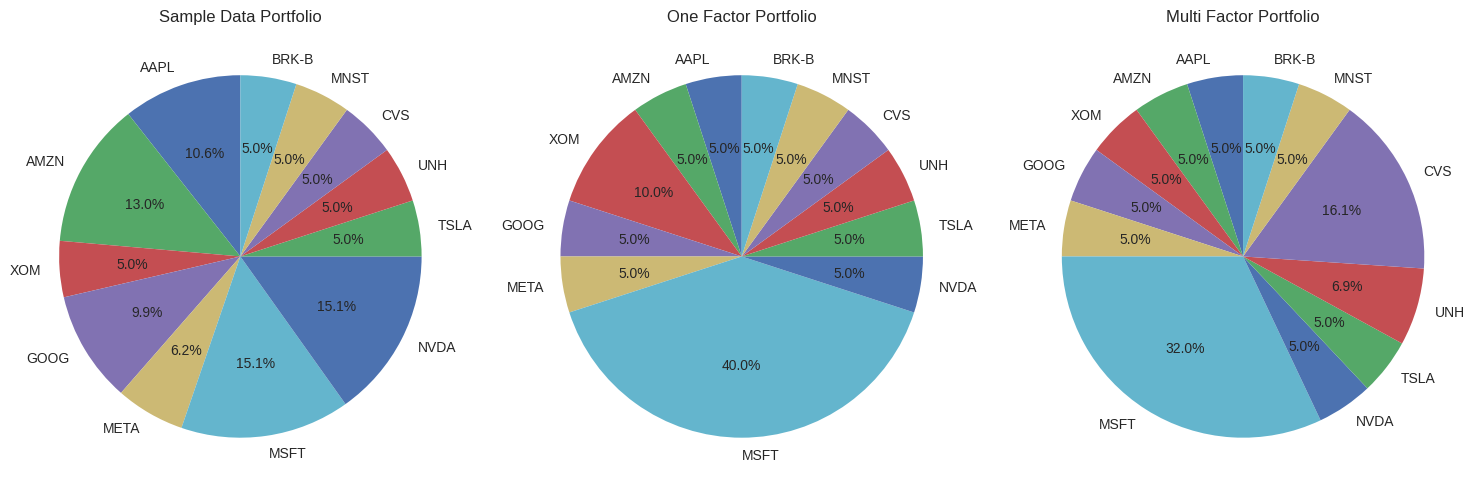

In [57]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Define data
labels = Weight.index.tolist()[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from labels
sample_data_weights = optimized_weights_sample_data  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
one_factor_weights = optimized_weights_one_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
multi_factor_weights = optimized_weights_multi_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights

# Create pie chart
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Sample Data portfolio
ax[0].pie(sample_data_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Sample Data Portfolio')

# One Factor portfolio
ax[1].pie(one_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('One Factor Portfolio')

# Multi Factor portfolio
ax[2].pie(multi_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Multi Factor Portfolio')

plt.tight_layout()
plt.show()